In [1]:
import os
import numpy as np
import shutil
import logging
from tqdm import tqdm
import copy

import numpy as np
import bilby
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

import sifce.parser as sparse
from sifce import tv

In [2]:
arguments, parser = sparse.parse(config_file="test_config.cfg")
simset = sparse.construct_simulationset_from_parsed_arguments(arguments)

In [3]:
n_int = 10000
simset.make_clean_simulations_dataframe()
simset.sample_from_sampling_distribution(n_int)
simset.fill_out_snr(N_sky=5000, N_scale=500, benchmark=False)

INFO:sifce.sims:Beginning sky scattering
10000it [05:32, 30.04it/s]
INFO:root:Reconfiguring distance prior based on computed maximum observable distance:            The new maximum is 483.85840399760457
INFO:sifce.sims:Beginning distance scaling
10000it [00:39, 255.26it/s]


,mass_1,mass_2,spin_1x,spin_1y,spin_1z,spin_2x,spin_2y,spin_2z,theta_jn,phase,...,cal_idx,opt_snr_H1,mf_snr_H1,opt_snr_L1,mf_snr_L1,opt_snr_net,mf_snr_net,iota,phi_1,phi_2
0,1.451351,1.439585,-0.013307,0.003671,-0.007412,0.043986,-0.066641,0.057363,1.211037,0.539781,...,NaN,519.988281,519.988281,663.644409,663.644409,1.955983,854.995361,1.207438,2.872403,5.295791
1,1.451351,1.439585,-0.013307,0.003671,-0.007412,0.043986,-0.066641,0.057363,1.211037,0.539781,...,NaN,519.988281,519.988281,663.644409,663.644409,1.798900,854.995361,1.207438,2.872403,5.295791
2,1.451351,1.439585,-0.013307,0.003671,-0.007412,0.043986,-0.066641,0.057363,1.211037,0.539781,...,NaN,519.988281,519.988281,663.644409,663.644409,2.908728,854.995361,1.207438,2.872403,5.295791
3,1.451351,1.439585,-0.013307,0.003671,-0.007412,0.043986,-0.066641,0.057363,1.211037,0.539781,...,NaN,519.988281,519.988281,663.644409,663.644409,4.179829,854.995361,1.207438,2.872403,5.295791
4,1.451351,1.439585,-0.013307,0.003671,-0.007412,0.043986,-0.066641,0.057363,1.211037,0.539781,...,NaN,519.988281,519.988281,663.644409,663.644409,2.098534,854.995361,1.207438,2.872403,5.295791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.458801,1.423772,-0.126394,-0.053610,-0.261093,-0.075745,0.060663,-0.296463,1.806523,3.664055,...,NaN,428.286591,428.286591,552.524780,552.524780,3.478471,711.011475,1.816362,3.542745,2.466316
4999996,1.458801,1.423772,-0.126394,-0.053610,-0.261093,-0.075745,0.060663,-0.296463,1.806523,3.664055,...,NaN,428.286591,428.286591,552.524780,552.524780,2.698308,711.011475,1.816362,3.542745,2.466316
4999997,1.458801,1.423772,-0.126394,-0.053610,-0.261093,-0.075745,0.060663,-0.296463,1.806523,3.664055,...,NaN,428.286591,428.286591,552.524780,552.524780,1.828802,711.011475,1.816362,3.542745,2.466316
4999998,1.458801,1.423772,-0.126394,-0.053610,-0.261093,-0.075745,0.060663,-0.296463,1.806523,3.664055,...,NaN,428.286591,428.286591,552.524780,552.524780,1.869999,711.011475,1.816362,3.542745,2.466316


In [4]:
#simset.sampling_distribution['luminosity_distance'].maximum=2000
#simset.target_distribution['luminosity_distance'].maximum=1800
simset.assign_sampling_distribution_log_probability()
simset.assign_target_distribution_log_probability()
#print(simset.sampling_distribution)
#print(simset.target_distribution)

In [6]:
simset.write_dataframe_and_distribution("Bootstrap_Importance_Sampling_Superset_BNS")
# simset.simulations_dataframe = simset.read_simset_dataframe(
#     input_path="/home/rudall/Projects/SIFCE/JupyterTests/Bootstrap_Importance_Sampling_Superset_dl50_bugfix2/simset_df.gzip"
# )

In [ ]:
simset.sampling_distribution = "/home/rudall/Projects/SIFCE/JupyterTests/Bootstrap_Importance_Sampling_Superset_dl50_bugfix/simset_sampling.priors.prior"
simset.target_distribution = "/home/rudall/Projects/SIFCE/JupyterTests/Bootstrap_Importance_Sampling_Superset_dl50_bugfix/simset_target.priors.prior"


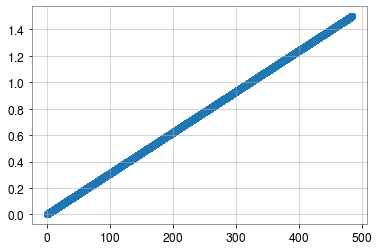

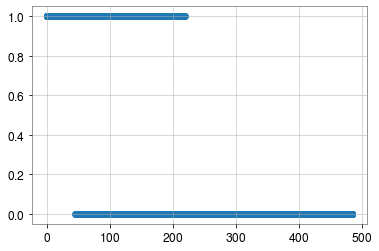

(array([ 51950., 150744., 251452., 351025., 450202., 549779., 649209.,
        748701., 848108., 948830.]),
 array([  1.0063276,  49.291534 ,  97.576744 , 145.86195  , 194.14716  ,
        242.43236  , 290.71756  , 339.00278  , 387.288    , 435.57318  ,
        483.8584   ], dtype=float32),
 <BarContainer object of 10 artists>)

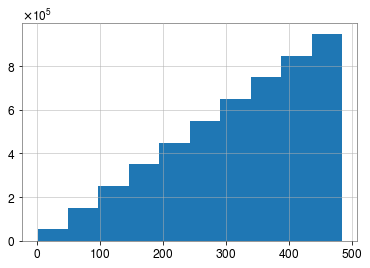

In [8]:
dLs = simset.simulations_dataframe['luminosity_distance'].values
ln_samp = simset.simulations_dataframe['ln_sampling_prob'].values
ln_target = simset.simulations_dataframe['ln_target_prob'].values
p_det = simset.simulations_dataframe['p_det'].values

plt.scatter(dLs, np.exp(ln_target - ln_samp))
plt.show()
plt.scatter(dLs, p_det)
plt.show()
plt.hist(dLs)

In [7]:
timevol = tv.TimeVolume(simulation=simset, function_detection=tv.get_step_function())
vt= timevol.sensitive_volume_importance_sampling()
print(vt)

0.007694385712015896 Gpc3 yr


In [9]:
simset_cp = copy.deepcopy(simset)

N_list = [100, 500, 1000, 5000, 10000]
all_intrinsic_ind = np.arange(n_int)

M = 1000 

bootstrapped_tvs_array = np.empty((len(N_list), M))

for ii, N in enumerate(N_list):
    for jj in tqdm(range(M-1)):
        tmp_intrinsic_idx = np.random.choice(all_intrinsic_ind, N)
        
        # get lists with idxs:
        ind_array, counts = np.unique(tmp_intrinsic_idx, return_counts=True)
        list_of_lists_of_idx = list()
        for kk in range(max(counts)):
            list_of_lists_of_idx.append(ind_array[counts >= (kk+1)])
        
        # get the dfs
        list_of_dfs = list()
        for lst in list_of_lists_of_idx:
            list_of_dfs.append(simset.simulations_dataframe.loc[simset.simulations_dataframe['intrinsic_index'].isin(lst)])
    
        simset_cp.simulations_dataframe = pd.concat(list_of_dfs, ignore_index=True)

        temp_timevol = tv.TimeVolume(simulation=simset_cp, function_detection=tv.get_step_function())
        bootstrapped_tvs_array[ii, jj] = temp_timevol.sensitive_volume_importance_sampling().value
    #np.savetxt("Bootstrap_tvs.csv", bootstrapped_tvs_array, delimiter=",")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999/999 [17:31<00:00,  1.05s/it]


In [ ]:
#np.savetxt("Bootstrap_tvs_DL500_bugfix.csv", bootstrapped_tvs_array, delimiter=",")

In [ ]:
#bootstrap_DL500=np.loadtxt("Bootstrap_tvs_DL500.csv", delimiter=",")

For n_int: 100
        D_L = 500: Variance is 1.5150234246408689e-06 and sigma is 0.0012308628780822292
For n_int: 500
        D_L = 500: Variance is 2.792837372922325e-07 and sigma is 0.0005284730241859394
For n_int: 1000
        D_L = 500: Variance is 1.407381844372405e-07 and sigma is 0.00037515088222905797
For n_int: 5000
        D_L = 500: Variance is 2.960667237184564e-08 and sigma is 0.0001720658954349921
For n_int: 10000
        D_L = 500: Variance is 1.5175952590574195e-08 and sigma is 0.00012319071633274235


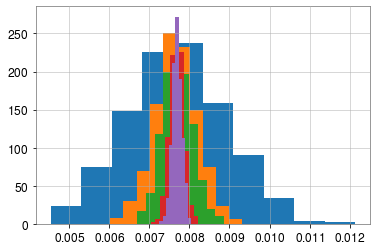

In [10]:
for ii, N in enumerate(N_list):
    plt.hist(bootstrapped_tvs_array[ii, :-1])
    #var50 = np.var(bootstrapped_tvs_array[ii, :-1])
    #sigma50 = np.sqrt(var50)
    var500 = np.var(bootstrapped_tvs_array[ii, :-1])
    sigma500 = np.sqrt(var500)
    print(f"For n_int: {N}\n\
        D_L = 500: Variance is {var500} and sigma is {sigma500}")